# Loading data : 6 first months of 2022 of real-estates sales in France 

In [63]:
import pandas as pd

In [64]:
# Source is https://www.data.gouv.fr/fr/datasets/r/87038926-fb31-4959-b2ae-7a24321c599a
df = pd.read_csv('./SourceFile/valeursfoncieres-2022-s1.zip', sep = '|', dtype='object')

In [65]:
df.head()

,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,24,1,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,140,3,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510


# Filtering on Paris only because the calculation of GPS coordinates take so much time...

In [66]:
print(df.shape[0])
df = df[df['Code departement']=='75']
print(df.shape[0])

1429093
49372


# We keep only apartments

In [67]:
print(df.shape[0])
df = df[df['Type local'].isin(['Appartement'])]
print(df.shape[0])

49372
21636


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21636 entries, 1379722 to 1429090
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Code service sages          0 non-null      object
 1   Reference document          0 non-null      object
 2   1 Articles CGI              0 non-null      object
 3   2 Articles CGI              0 non-null      object
 4   3 Articles CGI              0 non-null      object
 5   4 Articles CGI              0 non-null      object
 6   5 Articles CGI              0 non-null      object
 7   No disposition              21636 non-null  object
 8   Date mutation               21636 non-null  object
 9   Nature mutation             21636 non-null  object
 10  Valeur fonciere             20837 non-null  object
 11  No voie                     21636 non-null  object
 12  B/T/Q                       899 non-null    object
 13  Type de voie                21615 non-

# Adding full address field

In [69]:
df['Adresse'] = df['No voie'] + ' ' + df['Type de voie'] + ' ' + df['Voie'] + ' ' + df['Code postal'] + ' PARIS FRANCE'

# Removal of null and useless columns

In [70]:
df.drop(columns=['No disposition', 'Date mutation', 'Code service sages', 'Reference document', '1 Articles CGI', '2 Articles CGI'
                 , '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'Identifiant local', 'No Volume'
                 , 'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Commune', 'Code postal', 'Code departement', 'Code commune'
                 , 'Prefixe de section', 'Section', 'No plan', 'Code type local', 'Nature culture', 'Nature culture speciale'
                 , '1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot', 'Nombre de lots'], axis=1, inplace=True)

In [71]:
df.head(20)

,Nature mutation,Valeur fonciere,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Adresse
1379722,Vente,"580000,00",NaN,"61,00",NaN,NaN,NaN,Appartement,20,2,NaN,13 RUE DE SOFIA 75018 PARIS FRANCE
1379723,Vente,"580000,00","61,00",NaN,NaN,NaN,NaN,Appartement,25,2,NaN,13 RUE DE SOFIA 75018 PARIS FRANCE
1379725,Vente,"605000,00","40,66",NaN,NaN,NaN,NaN,Appartement,42,3,NaN,51 RUE CHARLOT 75003 PARIS FRANCE
1379732,Vente,"716250,00",NaN,"66,26",NaN,NaN,NaN,Appartement,69,3,NaN,6 RUE PAUL ESCUDIER 75009 PARIS FRANCE
1379734,Vente,"320000,00",NaN,"35,19",NaN,NaN,NaN,Appartement,33,2,NaN,4 RUE DU CHATEAU LANDON 75010 PARIS FRANCE
1379736,Vente,"320000,00","32,52",NaN,NaN,NaN,NaN,Appartement,29,1,NaN,134 AV GAMBETTA 75020 PARIS FRANCE
1379738,Vente,"220000,00","34,53",NaN,NaN,NaN,NaN,Appartement,36,2,NaN,9 RUE ELYSEE MENILMONTANT 75020 PARIS FRANCE
1379739,Vente,"280000,00","24,59",NaN,NaN,NaN,NaN,Appartement,28,2,NaN,18 RUE DES HAIES 75020 PARIS FRANCE
1379740,Vente,"200000,00","27,64",NaN,NaN,NaN,NaN,Appartement,27,2,NaN,195 RUE DE CRIMEE 75019 PARIS FRANCE
1379742,Vente,"677500,00","57,12",NaN,NaN,NaN,NaN,Appartement,58,3,NaN,79 RUE DES GRAVILLIERS 75003 PARIS FRANCE


In [72]:
df['Nature mutation'].value_counts(dropna=False)

Vente                                 21501
Echange                                 109
Adjudication                             16
Vente en l'état futur d'achèvement        8
Vente terrain à bâtir                     2
Name: Nature mutation, dtype: int64

# We keep only sales

In [73]:
print(df.shape[0])
df = df[df['Nature mutation'].isin(['Vente', "Vente en l'état futur d'achèvement"])]
print(df.shape[0])

21636
21509


# We normalize float data

In [74]:
for col in ['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot'
            , 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Surface terrain', 'Surface reelle bati']:
    df[col] = df[col].fillna('0').str.replace(',', '.').astype(float)
df['Nombre pieces principales'] = df['Nombre pieces principales'].fillna('0').astype(int)

# We compute real full surface and remove duplicates

In [75]:
df['Surface'] = df.apply(lambda x: x['Surface Carrez du 1er lot'] + x['Surface Carrez du 2eme lot'] + x['Surface Carrez du 3eme lot']
                         + x['Surface Carrez du 4eme lot'] + x['Surface Carrez du 5eme lot'], axis=1)
df['Surface'] = df.apply(lambda x: x['Surface reelle bati'] if x['Surface'] == 0 else x['Surface'], axis=1)

In [76]:
df.drop(columns=['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot'
                 , 'Surface Carrez du 4eme lot'
                , 'Surface Carrez du 5eme lot'
                , 'Surface terrain', 'Surface reelle bati'], axis=1, inplace=True)
print(df.shape[0])
df.drop_duplicates(inplace=True)
print(df.shape[0])

21509
20202


In [77]:
df.head()

,Nature mutation,Valeur fonciere,Type local,Nombre pieces principales,Adresse,Surface
1379722,Vente,580000.0,Appartement,2,13 RUE DE SOFIA 75018 PARIS FRANCE,61.00
1379725,Vente,605000.0,Appartement,3,51 RUE CHARLOT 75003 PARIS FRANCE,40.66
1379732,Vente,716250.0,Appartement,3,6 RUE PAUL ESCUDIER 75009 PARIS FRANCE,66.26
1379734,Vente,320000.0,Appartement,2,4 RUE DU CHATEAU LANDON 75010 PARIS FRANCE,35.19
1379736,Vente,320000.0,Appartement,1,134 AV GAMBETTA 75020 PARIS FRANCE,32.52


# Outliers removal

In [80]:
df['Nombre pieces principales'].value_counts()

2     6858
1     5291
3     4420
4     2094
5      963
6      339
7      132
8       42
0       38
9       10
10       5
11       4
15       2
13       2
14       1
12       1
Name: Nombre pieces principales, dtype: int64

In [81]:
print(df.shape[0])
df = df[df['Nombre pieces principales'] > 0]
print(df.shape[0])

20202
20164


In [82]:
df['Nombre pieces principales'].value_counts()

2     6858
1     5291
3     4420
4     2094
5      963
6      339
7      132
8       42
9       10
10       5
11       4
15       2
13       2
14       1
12       1
Name: Nombre pieces principales, dtype: int64

<AxesSubplot: xlabel='Nombre pieces principales'>

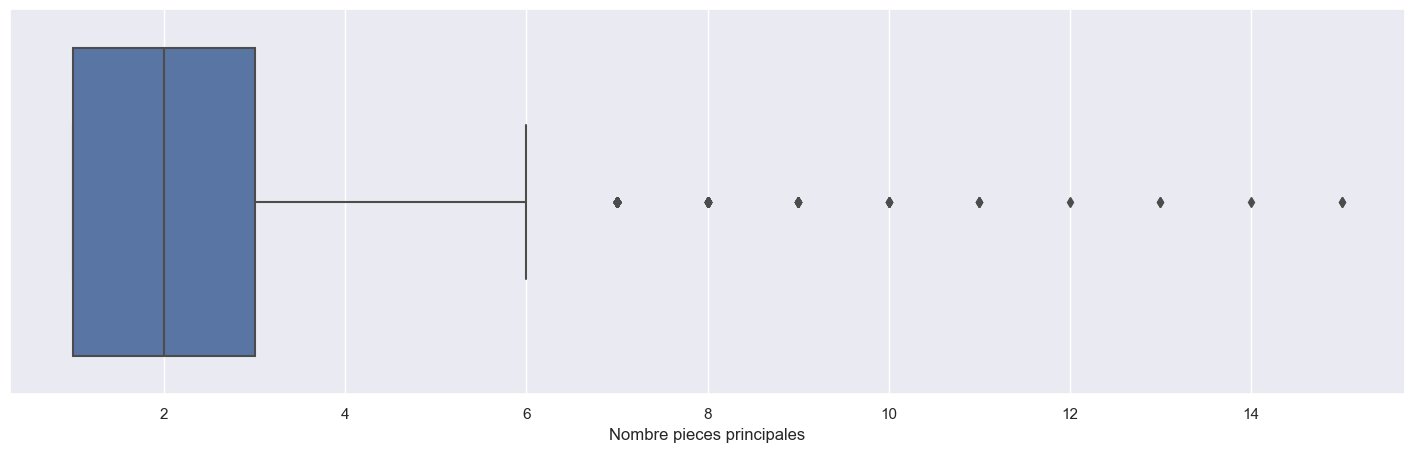

In [83]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x = df['Nombre pieces principales'])

# We remove outliers for number of rooms by keeping only less than 8 rooms

In [84]:
print(df.shape[0])
df = df[df['Nombre pieces principales'] < 8 ]
print(df.shape[0])

20164
20097


In [85]:
df.head()

,Nature mutation,Valeur fonciere,Type local,Nombre pieces principales,Adresse,Surface
1379722,Vente,580000.0,Appartement,2,13 RUE DE SOFIA 75018 PARIS FRANCE,61.00
1379725,Vente,605000.0,Appartement,3,51 RUE CHARLOT 75003 PARIS FRANCE,40.66
1379732,Vente,716250.0,Appartement,3,6 RUE PAUL ESCUDIER 75009 PARIS FRANCE,66.26
1379734,Vente,320000.0,Appartement,2,4 RUE DU CHATEAU LANDON 75010 PARIS FRANCE,35.19
1379736,Vente,320000.0,Appartement,1,134 AV GAMBETTA 75020 PARIS FRANCE,32.52


<AxesSubplot: xlabel='Surface'>

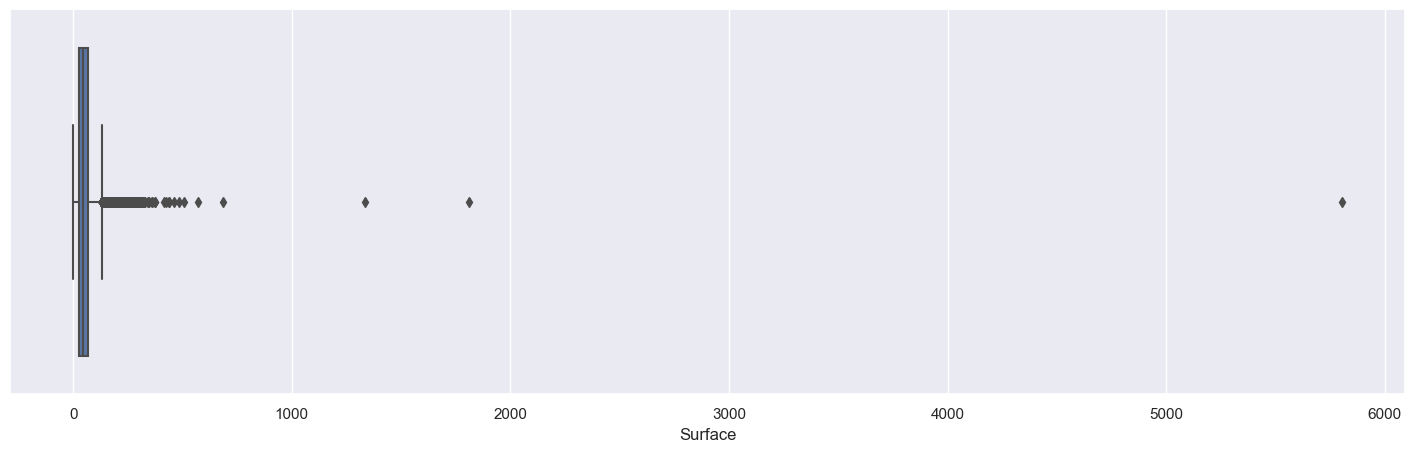

In [86]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x = df['Surface'])

<AxesSubplot: xlabel='Surface', ylabel='Count'>

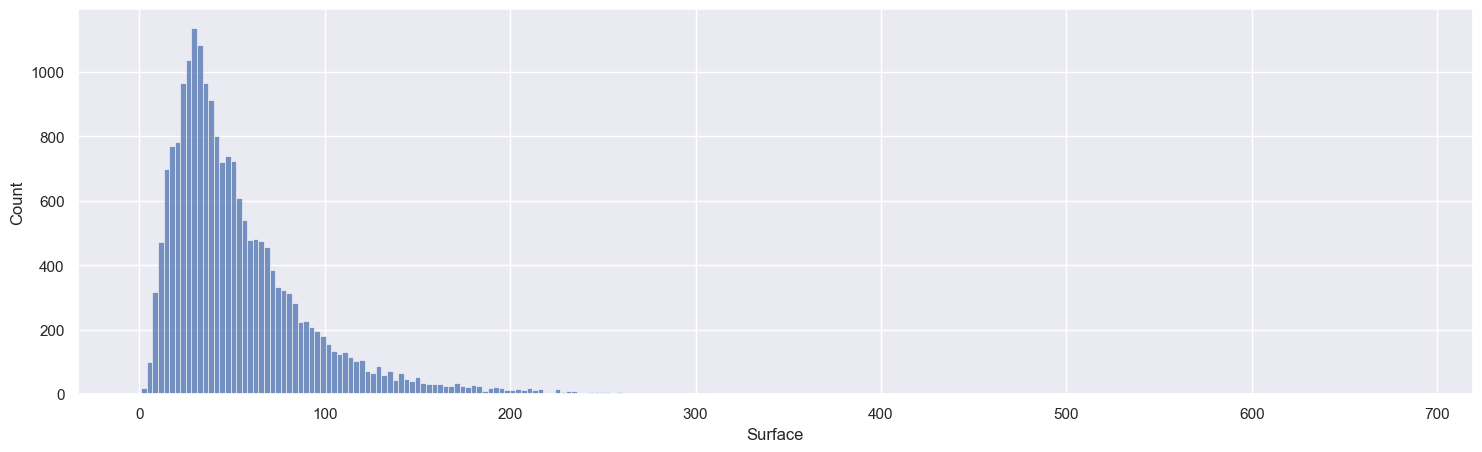

In [87]:
import seaborn as sns
sns.histplot(x = df[df['Surface'] < 1000]['Surface'])

# We choose to keep only goods with less than 260 square meters

<AxesSubplot: xlabel='Surface'>

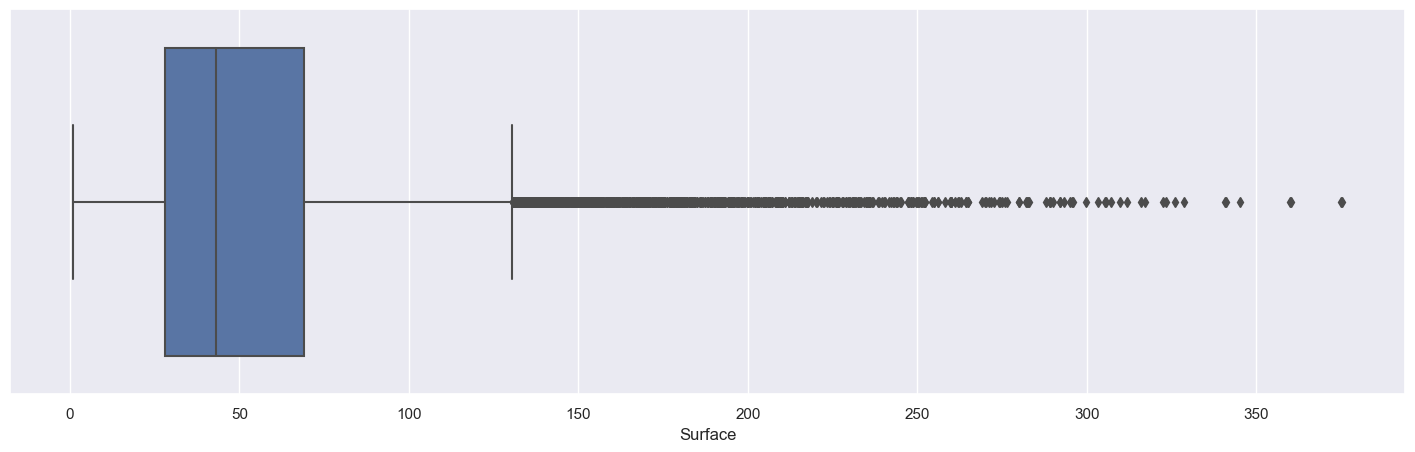

In [88]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18,5)})
sns.boxplot(x = df[df['Surface'] < 400]['Surface'])

In [89]:
print(df.shape[0])
df = df[df['Surface'] < 260]
print(df.shape[0])

20097
20024


# Getting GPS coordinates for all addresses

In [90]:
# Isolating addresses in a dedicateive DataFrame
df_adresse = df['Adresse'].to_frame()
df_adresse.drop_duplicates(inplace=True)
df_adresse

,Adresse
1379722,13 RUE DE SOFIA 75018 PARIS FRANCE
1379725,51 RUE CHARLOT 75003 PARIS FRANCE
1379732,6 RUE PAUL ESCUDIER 75009 PARIS FRANCE
1379734,4 RUE DU CHATEAU LANDON 75010 PARIS FRANCE
1379736,134 AV GAMBETTA 75020 PARIS FRANCE
...,...
1429053,4 RUE BEAUGRENELLE 75015 PARIS FRANCE
1429055,4 AV DE LA REPUBLIQUE 75011 PARIS FRANCE
1429065,71 BD DE GRENELLE 75015 PARIS FRANCE
1429079,20 RUE PIERRE LEROUX 75007 PARIS FRANCE


In [93]:
# DO NOT EXECUTE  : IT TAKES 3h30 TO EXECUTE !!!!
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# from tqdm import tqdm

# geolocator = Nominatim(user_agent="MyAppRE75")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# tqdm.pandas()

# df_adresse['location'] = df_adresse['Adresse'].progress_apply(geocode)
# df_adresse['Latitude'] = df_adresse['location'].apply(lambda loc: loc.point[0] if loc else None)
# df_adresse['Longitude'] = df_adresse['location'].apply(lambda loc: loc.point[1] if loc else None)
# df_adresse.to_csv(r'./TempFiles/GPS_adresses.csv', index=False)

# Reading results of GPS coordinates compute
df_adresse = pd.read_csv('./TempFiles/GPS_adresses.csv', dtype='object')

In [91]:
df_adresse

,Adresse
1379722,13 RUE DE SOFIA 75018 PARIS FRANCE
1379725,51 RUE CHARLOT 75003 PARIS FRANCE
1379732,6 RUE PAUL ESCUDIER 75009 PARIS FRANCE
1379734,4 RUE DU CHATEAU LANDON 75010 PARIS FRANCE
1379736,134 AV GAMBETTA 75020 PARIS FRANCE
...,...
1429053,4 RUE BEAUGRENELLE 75015 PARIS FRANCE
1429055,4 AV DE LA REPUBLIQUE 75011 PARIS FRANCE
1429065,71 BD DE GRENELLE 75015 PARIS FRANCE
1429079,20 RUE PIERRE LEROUX 75007 PARIS FRANCE


In [94]:
# 624 addresses were not computed :(
df_adresse[df_adresse['Latitude'].isnull()].count()

Adresse      624
location       0
Latitude       0
Longitude      0
dtype: int64

# Merging adresses (with gps coordinates) with the full DataFrame

In [95]:
df = pd.merge(df, df_adresse, how='left', on='Adresse')

In [96]:
df

,Nature mutation,Valeur fonciere,Type local,Nombre pieces principales,Adresse,Surface,location,Latitude,Longitude
0,Vente,580000.0,Appartement,2,13 RUE DE SOFIA 75018 PARIS FRANCE,61.00,"13, Rue de Sofia, Quartier de Clignancourt, Pa...",48.8845518,2.3481643490605
1,Vente,605000.0,Appartement,3,51 RUE CHARLOT 75003 PARIS FRANCE,40.66,"Pauline Pin, 51, Rue Charlot, Quartier des Enf...",48.8633027,2.3629937
2,Vente,716250.0,Appartement,3,6 RUE PAUL ESCUDIER 75009 PARIS FRANCE,66.26,"6, Rue Paul Escudier, Quartier Saint-Georges, ...",48.8804464,2.3323565
3,Vente,320000.0,Appartement,2,4 RUE DU CHATEAU LANDON 75010 PARIS FRANCE,35.19,"4, Rue du Château Landon, Quartier Saint-Vince...",48.8795741,2.3624495
4,Vente,320000.0,Appartement,1,134 AV GAMBETTA 75020 PARIS FRANCE,32.52,"134, Avenue Gambetta, Quartier Saint-Fargeau, ...",48.8733044,2.4051602
...,...,...,...,...,...,...,...,...,...
20019,Vente,130000.0,Appartement,1,20 RUE PIERRE LEROUX 75007 PARIS FRANCE,10.21,"Casa Cristo, 20, Rue Pierre Leroux, Quartier d...",48.8490626,2.3191414
20020,Vente,330375.0,Appartement,2,10 RUE DU CHEVALERET 75013 PARIS FRANCE,40.00,"10, Rue du Chevaleret, Quartier de la Gare, Pa...",48.8257763,2.3782797
20021,Vente,2801244.0,Appartement,6,3 VLA JOCELYN 75016 PARIS FRANCE,183.05,NaN,NaN,NaN
20022,Vente,423000.0,Appartement,2,43 RUE DES FAVORITES 75015 PARIS FRANCE,43.00,"43, Rue des Favorites, Quartier Saint-Lambert,...",48.837405,2.3052184


# We remove rows with no GPS coordinates

In [97]:
print(df.shape[0])
df = df[~df['Latitude'].isnull()]
print(df.shape[0])

20024
17988


In [98]:
# We remove useless columns
df.drop(columns=['Adresse', 'location'], axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)
df

C:\Users\ylequ\AppData\Local\Temp\ipykernel_13532\3415680733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Adresse', 'location'], axis=1, inplace=True)


,Nature mutation,Valeur fonciere,Type local,Nombre pieces principales,Surface,Latitude,Longitude
0,Vente,580000.0,Appartement,2,61.00,48.8845518,2.3481643490605
1,Vente,605000.0,Appartement,3,40.66,48.8633027,2.3629937
2,Vente,716250.0,Appartement,3,66.26,48.8804464,2.3323565
3,Vente,320000.0,Appartement,2,35.19,48.8795741,2.3624495
4,Vente,320000.0,Appartement,1,32.52,48.8733044,2.4051602
...,...,...,...,...,...,...,...
17983,Vente,750000.0,Appartement,5,79.00,48.8452197,2.3920473
17984,Vente,130000.0,Appartement,1,10.21,48.8490626,2.3191414
17985,Vente,330375.0,Appartement,2,40.00,48.8257763,2.3782797
17986,Vente,423000.0,Appartement,2,43.00,48.837405,2.3052184


In [99]:
df.to_csv(r'./TempFiles/RealEstate_PARIS_FR_2022.csv', index=False)